

# Data Wrangling Project


This project encompasses the three phases of the data wrangling process: Gathering, Assessing and Cleaning.
The dataset to be wrangled (and analyzed and visualized) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## Gather Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import tweepy
import json
import os
import requests
import re

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', 500) # To make colums values more readable

### Gather the WeRateDogs Twitter archive (csv  file)

In [3]:
# Read 'twitter_archive_enhanced.csv' (file on hand) and store it in a dataframe

dog_rates_df = pd.read_csv('twitter_archive_enhanced.csv')

In [4]:
dog_rates_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

### Gather the tweet image predictions (tsv  file)
Note that original name of the file includes dashes ('-') instead of underscore ('\_') characters

In [5]:
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(file_url) # response.content in bytes

In [6]:
# It should be Response [200]
response

<Response [200]>

In [7]:
current_dir = os.getcwd() # get current directory

image_predictions_path = os.path.join(current_dir, 'image_predictions.tsv')

with open(image_predictions_path, mode='wb') as file:
    file.write(response.content) # save content to a file in the current directory

In [8]:
# Read 'image_predictions.tsv' and store it in a dataframe
image_predictions_df = pd.read_csv(image_predictions_path, sep = '\t')

### Gather Tweeter data (JSON data)
Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data is written to its own line. Then this .txt file is read line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count, and XXX, in_reply_to_status_id, in_reply_to_user_id.

In [9]:
# Note: use your own Twitter API keys, secrets, and tokens

with open(os.path.join(current_dir, 'Twitter_Access.json')) as file:
    file_dict = json.load(file)

consumer_key = file_dict["consumer_key"]
consumer_secret = file_dict["consumer_secret"]
access_token = file_dict["access_token"]
access_secret = file_dict["access_secret"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Source: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [10]:
dog_rates_df['tweet_id'].dtype

dtype('int64')

In [11]:
# Check if any duplicated tweet_id
dog_rates_df.shape[0], dog_rates_df.tweet_id.nunique()

(2356, 2356)

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# Save each tweet's of JSON data as a new line in a file called tweet_json.txt file

tweet_id_list = dog_rates_df['tweet_id']

tweet_json_path = os.path.join(current_dir, 'tweet_json.txt')

if not os.path.exists(tweet_json_path):

    #Save each tweet's returned JSON as a new line in a .txt file
    with open(tweet_json_path, mode='w') as file:
        for tweet_id in tweet_id_list:
            try:
                tweet = api.get_status(id=tweet_id, tweet_mode='extended') # Tweet data is stored in JSON format by Twitter
                print(tweet_id)
                json.dump(tweet._json, file) # save content to a file in the current directory
                file.write(os.linesep) # append a line to the file in the current directory

            except tweepy.TweepError as te:
                print("{}, tweet_id {}".format(te, tweet_id))

# Source: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [13]:
tweet_dict = {}

with open(tweet_json_path, mode='r') as file:
    for line in file:
        tweet_json_data = json.loads(line)
        
        dict_key = int(tweet_json_data['id']) # assign tweet_id as key
        
        dict_values = dict(
            favorites = int(tweet_json_data['favorite_count']),
            retweets = int(tweet_json_data['retweet_count']), 
            user_followers = int(tweet_json_data['user']['followers_count']),
            user_favourites = int(tweet_json_data['user']['favourites_count']),
            language = tweet_json_data['lang']
        )
    
        tweet_dict[dict_key] = dict_values
        
# Source: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html

In [14]:
tweet_json_df = pd.DataFrame.from_dict(tweet_dict, orient='index')

In [15]:
tweet_json_df.head()

,favorites,retweets,user_followers,user_favourites,language
666020888022790149,2535,507,7495766,140351,en
666029285002620928,128,47,7495766,140351,en
666033412701032449,124,43,7495766,140351,en
666044226329800704,296,139,7495766,140351,en
666049248165822465,108,41,7495766,140351,en


## Assess

### Dog_rates Table

In [16]:
dog_rates_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [17]:
dog_rates_df.shape

(2356, 17)

In [18]:
dog_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
dog_rates_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# Records of dogs with names in lowercase
dog_name_islower = dog_rates_df['name'].str.islower()
name_islower = dog_rates_df[dog_name_islower]
name_islower

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [21]:
name_islower.name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
mad              2
actually         2
not              2
life             1
this             1
my               1
incredibly       1
light            1
old              1
his              1
officially       1
all              1
such             1
infuriating      1
unacceptable     1
by               1
space            1
Name: name, dtype: int64

In [22]:
len(name_islower)

109

In [23]:
# Checking 'names' from the 'text' column
dog_rates_df[['text', 'name']]

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie


In [24]:
# Records with one-letter name (besides 'a')
len_one = (dog_rates_df['name'].str.len()==1)
no_a = (dog_rates_df['name']!='a')
dog_rates_df[len_one & no_a][['text','name']]

,text,name
775,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O


In [25]:
# Find text that contains 'only rate dogs' (per the pictures from the expanded_urls most of them are dogs portraying other species)
only_rate_dogs = dog_rates_df['text'].str.contains('only rate dogs', regex=False)
dog_rates_df[only_rate_dogs]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,12,10,None,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/M5Rz0R8SIQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520902168576/photo/1,13,10,None,None,None,None,None
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/864873206498414592/photo/1,https://twitter.com/dog_rates/status/864873206498414592/photo/1",14,10,None,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/862096992088072192/photo/1,https://twitter.com/dog_rates/status/862096992088072192/photo/1",13,10,None,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,

In [26]:
len(dog_rates_df[only_rate_dogs])

64

In [27]:
dog_rates_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
# Records with rating_denominator different from 10
dog_rates_df[dog_rates_df.rating_denominator!=10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']]

,tweet_id,text,rating_numerator,rating_denominator,name
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert


In [29]:
# Check for duplicated tweet_ids
dog_rates_df.duplicated('tweet_id', keep=False).sum()

0

### Image_predictions Table

In [30]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [33]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
# Amount of duplicated images
image_predictions_df.jpg_url.duplicated().sum()

66

### Tweet_Json Table

In [35]:
tweet_json_df

,favorites,retweets,user_followers,user_favourites,language
666020888022790149,2535,507,7495766,140351,en
666029285002620928,128,47,7495766,140351,en
666033412701032449,124,43,7495766,140351,en
666044226329800704,296,139,7495766,140351,en
666049248165822465,108,41,7495766,140351,en
666050758794694657,132,59,7495766,140351,en
666051853826850816,1208,841,7495766,140351,en
666055525042405380,430,242,7495767,140351,en
666057090499244032,291,140,7495767,140351,en
666058600524156928,110,57,7495767,140351,en


In [36]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 666020888022790149 to 892420643555336193
Data columns (total 5 columns):
favorites          2342 non-null int64
retweets           2342 non-null int64
user_followers     2342 non-null int64
user_favourites    2342 non-null int64
language           2342 non-null object
dtypes: int64(4), object(1)
memory usage: 109.8+ KB


In [37]:
# Non-English records
tweet_json_df[tweet_json_df.language != 'en']

,favorites,retweets,user_followers,user_favourites,language
667192066997374976,390,109,7495767,140351,et
667435689202614272,307,84,7495767,140351,nl
667550882905632768,0,33,7495767,140351,ro
668967877119254528,149,25,7495767,140351,tl
674330906434379776,576,76,7495766,140351,und
674790488185167872,1136,263,7495766,140351,nl
682697186228989953,1378,386,7495729,140351,in
683098815881154561,2279,707,7495729,140351,nl
690607260360429569,304,17,7496304,140352,und
704491224099647488,805,88,7495726,140351,es


In [38]:
tweet_json_df.language.unique()

array(['en', 'et', 'nl', 'ro', 'tl', 'und', 'in', 'es', 'eu'], dtype=object)

In [39]:
# Unique user_followers values
tweet_json_df.user_followers.unique()

array([7495766, 7495767, 7496343, 7496342, 7495765, 7496341, 7495764,
       7496340, 7495732, 7495731, 7495730, 7495729, 7496305, 7495728,
       7496304, 7495727, 7496303, 7495726, 7495725, 7496302, 7495706,
       7496378, 7495707, 7495708, 7496379, 7495705, 7495704, 7495703,
       7496376], dtype=int64)

In [40]:
# Unique user_favourites values
tweet_json_df.user_favourites.unique()

array([140351, 140352, 140353], dtype=int64)

## Assessment

### Quality
##### `Dog_rates` table
1. Ratings with no images should not be kept.
2. Some of the tweets with the dog ratings are retweets (text starts with `RT @`, and in_reply_to & retweeted_status data is not null). We want original ratings (no retweets) that have images.
3. Missing data in in_reply_to_, retweeted_status & expanded_urls information ***(is not going to be addressed)***
4. Erroneous datatype of column timestamp
5. Nulls represented as 'None' in the name and stage columns
6. Inaccurate names:
    - 6.1 Names values in lowercase are not actual names: such, a, quite, not, one, incredibly, mad, an, by, the, ...
    - 6.2 Some missing names are extractable from the `text` column
    - 6.3 One-letter names
    - 6.4 For multiple dogs, null names ***(is not going to be addressed)***
7. Some records are not about dogs. Ex: tweet_id 670842764863651840 is a human & tweet_id 748692773788876800 is a horse
8. Inaccurate ratings: 11/15 & 9/11 from dates, 960/00, 50/50, 4/20, 7/11, 1/2, 75/10, 27/10...
    - 8.1 Rating denominators different from 10
    - 8.2 Rating numerators greater than 20
9. There are tweets for group of dogs (usually with ratings out of range: 204/170, 60/50, 84/70, 99/90, ..., ratings multiplied by the number of dogs). ***For these records, ratings are addressed, but not the names and the stages (the last is going to be set as Null if categorized with multiple stages).***
10. Tweets miscategorized with multiple stages. In this case for tweets of multiple dogs, stages are going to be set as Null.
11. Expanded urls with more than one url, lists same values (internal duplicated values) ***(is not going to be addressed)***
 

##### `Image_predictions` table
12. img_num column could be categorical ***(is not going to be addressed)***
13. 66 duplicated images

##### `Tweet_json` table
14. Language column could be categorical. Some categories different than 'en' might be innacurate ***(is not going to be addressed)***

### Tidiness
- Ratings with no images should not be kept. (Listed in Tidiness since a merge is needed between the ratings & images)
- Tweet_json table columns should be part of Dog_rates table
- Columns doggo, floofer, pupper, puppo should be values in `Dog_rates` table under one column ('stage') - Classification per the dogtionary - Type Categorical
- In_reply_to and retweeted_status columns from table `Dog_rates` are extraneous since only original tweets should be kept
- Text column in `Dog_rates` table contains variables name, description, rating and image_url ***(it is not going to be addressed)***
- Column tweet_id duplicated in all tables (as columns in `Dog_rates` and `Image_predictions`, and as Index in the `Tweet_json` table)
- Prediction columns, conf and dog could be melted, should have 4 columns instead of 9 (4th column type of algorithym) ***(it is not going to be addressed)***
- Rating_numerator and denominator should be one variable rating ***(it is not going to be addressed)***

## Clean

In [41]:
# Make copies to keep original DataFrames apart and do cleaning on the copies
dog_rates_clean = dog_rates_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_json_clean = tweet_json_df.copy()

##### Define 1-2
- Merge ratings with images dataframes, drop records without images by inner merging and drop predictions data by slicing
- Drop retweets with duplicated images using drop_duplicates function

##### Code 1-2

In [42]:
# Merge of rating and images dataframes on tweet_id and select all the columns but the predictions from images df
rates_images_df = dog_rates_clean.merge(image_predictions_clean, on='tweet_id').iloc[:,:-10]

In [43]:
# Number of tweets with images
tweets_with_images = len(rates_images_df)

# Tweets with duplicated images (includes original and duplicate)
duplicated_images = rates_images_df[rates_images_df.duplicated('jpg_url', keep=False)]

# Number of retweets with images
retweets = duplicated_images.text.str.startswith('RT @').sum()

print('Out of {} tweets with images, there are {} duplicates, where {} of them are retweets'.\
    format(tweets_with_images, len(duplicated_images), retweets))

Out of 2075 tweets with images, there are 132 duplicates, where 66 of them are retweets


In [44]:
# Drop tweets which text starts with 'RT @' (these are retweets)
# At the same time it drops the 66 retweets with duplicated jpg_urls since all of the text fields of these rows start with 'RT @'

start_with_RT = rates_images_df.text.str.startswith('RT @')
print('There are {} tweets, which text starts with "RT @" (these are retweets)'.format(start_with_RT.sum()))

rates_images_df = rates_images_df[~start_with_RT]

There are 81 tweets, which text starts with "RT @" (these are retweets)


In [45]:
# Drop tweets that have not null data in_reply_to columns (these are retweets)

not_null_replies = rates_images_df.in_reply_to_status_id.notnull().sum()
print('There are {} tweets that have no null data the in_reply_to columns (these are retweets)'.format(not_null_replies))

rates_images_df = rates_images_df[rates_images_df.in_reply_to_status_id.isnull()]

There are 23 tweets that have no null data the in_reply_to columns (these are retweets)


##### Test 1-2

In [46]:
# Entries should be 1971 = 2075-81-23
rates_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 18 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
jpg_url                       1971 non-n

In [47]:
# Drop in_reply_to & reweeted_status columns by slicing since retweet data is null
rates_images_df = rates_images_df[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', \
                                   'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url']]
rates_images_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url
1232,695051054296211456,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Brian (pronounced ""Kirk""). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi","https://twitter.com/dog_rates/status/695051054296211456/photo/1,https://twitter.com/dog_rates/status/695051054296211456/photo/1",6,10,Brian,None,None,None,None,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg
639,773704687002451968,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Loki. He knows he's adorable. One ear always pupared. 12/10 would snug in depicted fashion forever https://t.co/OqNggd4Oio,"https://twitter.com/dog_rates/status/773704687002451968/photo/1,https://twitter.com/dog_rates/status/773704687002451968/photo/1",12,10,Loki,None,None,None,None,https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg
1137,703611486317502464,2016-02-27 16:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scooter. He's experiencing the pupper equivalent of dropping ur phone in a toilet 10/10 put it in some rice pup https://t.co/JSmX1FIEaW,https://twitter.com/dog_rates/status/703611486317502464/photo/1,10,10,Scooter,None,None,pupper,None,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg
1318,688519176466644993,2016-01-17 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper is sprouting a flower out of her head. 12/10 revolutionary af https://t.co/glmvQBRjv4,https://twitter.com/dog_rates/status/688519176466644993/photo/1,12,10,None,None,None,pupper,None,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg
2073,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
1071,708834316713893888,2016-03-13 01:57:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Malikai. He was rolling around having fun when he remembered the inevitable heat death of the universe. 10/10 https://t.co/Vd2FqHIIGn,https://twitter.com/dog_rates/status/708834316713893888/photo/1,10,10,Malikai,None,None,None,None,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg
1183,699370870310113280,2016-02-15 23:13:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Calbert. He doesn't have enough legs. Wtf Calbert. Still havin a blast tho. 11/10 would pet extra well https://t.co/iNFIHvcVur,https://twitter.com/dog_rates/status/699370870310113280/photo/1,11,10,Calbert,None,None,None,None,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg
801,750026558547456000,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI,https://twitter.com/dog_rates/status/750026558547456000/photo/1,10,10,Jax,None,None,None,None,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg
1982,667546741521195010,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,None,None,None,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.j

##### Define 4
Dog_rates: Convert erroneous datatypes
- timestamp data column: object to datetime using pd.to_datetime
- retweeted_status columns are not going to be addressed since retweeted data is going to be dropped

##### Code 4

In [48]:
rates_images_df.timestamp = pd.to_datetime(rates_images_df.timestamp)

##### Test 4

In [49]:
rates_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 215.6+ KB


##### Define 5
Replace 'None' values by Nan in all columns using replace function

##### Code 5

In [50]:
rates_images_df.replace('None', np.nan, inplace=True)    

##### Test 5

In [51]:
# Confirm the replacement worked
# lenght of dataframe where column values equal 'None' should be 0

cols = ['name', 'doggo', 'floofer', 'pupper', 'puppo']

for col in cols:
    print('Number of rows where "{}" values equals "None": {}'.format(col, len(rates_images_df[rates_images_df[col]=='None'])))

Number of rows where "name" values equals "None": 0
Number of rows where "doggo" values equals "None": 0
Number of rows where "floofer" values equals "None": 0
Number of rows where "pupper" values equals "None": 0
Number of rows where "puppo" values equals "None": 0


In [52]:
rates_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1447 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
jpg_url               1971 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 215.6+ KB


##### Define 6
Inaccurate names:
- 6.1 Fill missing names through a dictionary of indexes and corresponding correct names
- 6.2 Replace lowercase names with Null and then get the actual names from the 'text' column if available, using regular expressions

##### Code 6

6.1 Fill missing names through a dictionary of indexes and corresponding correct names

In [53]:
# Fill missing names with correct names
names_dict = {132:'Boomer', 775:"O'Malley", 816:'Quizno', 1987:'Big Jumpy Rat'}

for key, value in names_dict.items():
        rates_images_df.loc[key,'name']=value

6.2 Replace lowercase names with Null and then get the actual names from the 'text' column if available, using regular expressions

In [54]:
name_cols = ['tweet_id','text','name'] # name-related columns

notnull_names = rates_images_df[rates_images_df.name.notnull()] # Records with no null names
lowerc_names = notnull_names[notnull_names.name.str[0].str.islower()] # Records with name starting with lowercase (doesn't work on Nan values)

In [55]:
# Checking records with lowercase names
lowerc_names[name_cols]

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
51,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
142,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
156,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
294,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
439,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
525,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
648,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
664,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very
692,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my


In [56]:
# Replace lowercase names with Nan values

names_indexes = lowerc_names.index.values

for idx in names_indexes:
    rates_images_df.loc[idx,'name']=np.NaN

In [57]:
# Records with null names (Nan values) - Checking patterns in text to extract names
null_names = rates_images_df[rates_images_df.name.isnull()]
null_names[name_cols]

,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN
12,889665388333682689,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN
24,887343217045368832,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN
34,885167619883638784,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN
38,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN
43,883117836046086144,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",NaN
51,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN


In [58]:
# On null-names records, extract names from text column if available per the Regular Expressions

regexs = [r'named ([A-Z]\w+)', r'name is ([A-Z]\w+)', r'this is ([A-Z]\w+)']

for reg in regexs:
    extract_names = null_names['text'].str.extract(reg, expand=False) # return a Series since expand=False
    not_null_extracted = extract_names[extract_names.notnull()] # Dataframe of extracted names
    names_indexes = not_null_extracted.index.values # indexes of name values to change

    # Fill names with extracted names
    for idx in names_indexes:
        rates_images_df.loc[idx,'name']=not_null_extracted[idx]

##### Test 6

In [59]:
# Lowercase names should be empty
not_null = (rates_images_df.name.notnull())
lowerc = (rates_images_df.name.str.islower())

rates_images_df[not_null & lowerc]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url


In [60]:
# Checking records with text containing 'name' have accurate names
rates_images_df[rates_images_df['text'].str.contains('name')][name_cols]

,tweet_id,text,name
141,859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,Zoey
298,828376505180889089,"This is Beebop. Her name means ""Good Dog"" in robot. She also was a star on the field today. 13/10 would pet well https://t.co/HKBVZqXFNR",Beebop
692,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,Zoey
799,750056684286914561,This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,Jameson
942,728387165835677696,"This is Enchilada (yes, that's her real name). She's a Low-Cruisin Plopflopple. Very rare. Only a few left. 12/10 https://t.co/SiaiTWgsfP",Enchilada
1421,682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,Thea
1460,680161097740095489,Meet Goliath. He's an example of irony. Head is phenomenally round. Wants to be an ornament. 12/10 would hug gently https://t.co/72Dil0Aktw,Goliath
1466,680070545539371008,Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,Emmie
1474,679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,Sabertooth
1487,679062614270468097,This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,Chompsky


In [61]:
rates_images_df.loc[276,:][name_cols]

tweet_id                                                                                                                                                      831650051525054464
text        I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO
name                                                                                                                                                                        Blue
Name: 276, dtype: object

In [62]:
rates_images_df.loc[878,:][name_cols]

tweet_id                                                                                                                              740373189193256964
text        After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
name                                                                                                                                            Bretagne
Name: 878, dtype: object

##### Define 7
Drop Tweet Ids 670842764863651840 and 748692773788876800 since they are not dogs!!!

##### Code 7

In [63]:
is_human = (rates_images_df.tweet_id==670842764863651840)
is_a_horse = (rates_images_df.tweet_id==748692773788876800)

rates_images_df.drop(rates_images_df[is_human|is_a_horse].index, inplace=True)

##### Test 7

In [64]:
# It should be empty
rates_images_df.query('(tweet_id==670842764863651840)|(tweet_id==748692773788876800)')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url


##### Define 8
8.Inaccurate ratings: 11/15 & 9/11 read from dates, others rate multiple puppies (calculate proportions), 24/7 refers to time (Sam), others need to approximate their numerator 9.75/10, 11.27/10, 11.26/10
960/00, 50/50, 4/20, 7/11, 1/2, 75/10, 27/10...
- 8.1 Rating denominators different from 10
- 8.2 Rating numerators greater than 20

##### Code8

In [65]:
# Rating denominators different from 10
invalid_rating_denominator = rates_images_df[rates_images_df.rating_denominator!=10]
invalid_rating_denominator = invalid_rating_denominator[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']]
invalid_rating_denominator

,tweet_id,text,rating_numerator,rating_denominator,name
346,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,NaN
416,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
736,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,NaN
878,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,Bretagne
926,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,NaN
969,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN
1003,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert
1024,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,NaN
1049,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,NaN
1067,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,NaN


In [66]:
# Recalculate 11 ratings for multiple puppers ratings
indexes = [346, 736, 926, 1024, 1049, 1067, 1133, 1209, 1382, 1514, 1573]
num_puppers = [7, 15, 17, 9, 8, 5, 5, 4, 11, 12, 8] # got these numbers per the pictures

for idx in indexes:
    i = indexes.index(idx)
    rates_images_df.loc[idx, 'rating_numerator'] //= num_puppers[i]
    rates_images_df.loc[idx, 'rating_denominator'] //=  num_puppers[i]

In [67]:
# Assign correct values to 5 ratings (misread from dates, floats, ..)

indexes = [878, 969, 1003, 1407, 2054]
rating_num = [14, 13, 11, 10, 9]

for idx in indexes:
    i = indexes.index(idx)
    rates_images_df.loc[idx, 'rating_numerator'] = rating_num[i]
    rates_images_df.loc[idx, 'rating_denominator'] = 10

In [68]:
# Drop record without rating
rates_images_df.drop(416, inplace=True)

In [69]:
rates_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null datetime64[ns]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
name                  1381 non-null object
doggo                 72 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
jpg_url               1968 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 215.2+ KB


In [70]:
# Rating numerators greater than 20
invalid_rating_numerator = rates_images_df[(rates_images_df.rating_numerator>=20)]
invalid_rating_numerator = invalid_rating_numerator[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']]
invalid_rating_numerator

,tweet_id,text,rating_numerator,rating_denominator,name
559,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan
615,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie
804,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,Atticus
1453,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,NaN


In [71]:
# Assign correct values of 3 numerators (misread from floats)

rates_images_df.loc[559, 'rating_numerator'] = 10
rates_images_df.loc[615, 'rating_numerator'] = rates_images_df.loc[1453, 'rating_numerator'] = 11

##### Test 8

In [72]:
idx1 = [346, 736, 926, 1024, 1049, 1067, 1133, 1209, 1382, 1514, 1573]
idx2 = [878, 969, 1003, 1407, 2054]
indexes = idx1 + idx2
indexes.sort()
    
rates_images_df.loc[indexes][['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']]

,tweet_id,text,rating_numerator,rating_denominator,name
346,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12,10,NaN
736,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,11,10,NaN
878,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10,Bretagne
926,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,12,10,NaN
969,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10,NaN
1003,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10,Bluebert
1024,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11,10,NaN
1049,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10,10,NaN
1067,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9,10,NaN
1133,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12,10,NaN


In [73]:
# It should be empty
rates_images_df[rates_images_df.rating_denominator!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url


Now the column 'rating_denominator' is extraneous since it has only one value: 10

It is going to be dropped when melting the stage columns (Code 11)

In [74]:
# It should show only one record: Atticus (this is an outlier!)
rates_images_df[(rates_images_df.rating_numerator>=20)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url
804,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


##### Define 10
Tweets miscategorized with multiple stages: check the different combinations of multiple stages; and then assign NaN value to the innacurate stage to keep only the correct (for multidogs categorized with multistages, stages are going to be set as Nan too)

##### Code 10

In [75]:
stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']

is_doggo = rates_images_df.doggo.notnull()
is_floofer = rates_images_df.floofer.notnull()
is_pupper = rates_images_df.pupper.notnull()
is_puppo = rates_images_df.puppo.notnull()

Combinations of multi-stages dogs

In [76]:
doggo_floofer = rates_images_df[(is_doggo) & (is_floofer)][['tweet_id', 'text','name']+stage_cols]
doggo_floofer

,tweet_id,text,name,doggo,floofer,pupper,puppo
161,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,doggo,floofer,NaN,NaN


In [77]:
doggo_puppo = rates_images_df[(is_doggo) & (is_puppo)][['tweet_id', 'text','name']+stage_cols]
doggo_puppo

,tweet_id,text,name,doggo,floofer,pupper,puppo
155,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,doggo,NaN,NaN,puppo


In [78]:
doggo_pupper = rates_images_df[(is_doggo) & (is_pupper)][['tweet_id', 'text','name']+stage_cols]
doggo_pupper

,tweet_id,text,name,doggo,floofer,pupper,puppo
367,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",Dido,doggo,NaN,pupper,NaN
430,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,doggo,NaN,pupper,NaN
465,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,Bones,doggo,NaN,pupper,NaN
567,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,Pinot,doggo,NaN,pupper,NaN
724,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",Maggie,doggo,NaN,pupper,NaN
782,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo,NaN,pupper,NaN
873,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,doggo,NaN,pupper,NaN
919,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo,NaN,pupper,NaN


In [79]:
floofer_pupper = rates_images_df[(is_floofer) & (is_pupper)][['tweet_id', 'text','name']+stage_cols]
floofer_pupper

,tweet_id,text,name,doggo,floofer,pupper,puppo


In [80]:
floofer_puppo = rates_images_df[(is_floofer) & (is_puppo)][['tweet_id', 'text','name']+stage_cols]
floofer_puppo

,tweet_id,text,name,doggo,floofer,pupper,puppo


In [81]:
pupper_puppo = rates_images_df[(is_pupper) & (is_puppo)][['tweet_id', 'text','name']+stage_cols]
pupper_puppo

,tweet_id,text,name,doggo,floofer,pupper,puppo


In [82]:
# Chage to Nulls the wrong categorization
# For tweets of multidogs, multiple stages are going to be set as Nulls

stages_dict = {155:['doggo'], 161:['doggo'], 367: ['pupper'], 430: stage_cols, 465:['doggo'], 567:['pupper'], 724: stage_cols, \
               782: ['doggo', 'pupper'], 873: stage_cols, 919: stage_cols}

for key, value in stages_dict.items():
        for stage in value:
            rates_images_df.loc[key, stage] = np.NaN

##### Test 10

In [83]:
# Confirming changes
# It should be categorized as floofer only
rates_images_df[rates_images_df.tweet_id==854010172552949760][['tweet_id', 'text','name']+stage_cols]

,tweet_id,text,name,doggo,floofer,pupper,puppo
161,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,floofer,NaN,NaN


In [84]:
# It should be categorized as puppo only
rates_images_df[rates_images_df.tweet_id==855851453814013952][['tweet_id', 'text','name']+stage_cols]

,tweet_id,text,name,doggo,floofer,pupper,puppo
155,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,NaN,puppo


In [85]:
rates_images_df[(is_doggo) & (is_pupper)][['tweet_id', 'text','name']+stage_cols]

,tweet_id,text,name,doggo,floofer,pupper,puppo
367,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",Dido,doggo,NaN,NaN,NaN
430,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,NaN,NaN
465,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,Bones,NaN,NaN,pupper,NaN
567,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,Pinot,doggo,NaN,NaN,NaN
724,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",Maggie,NaN,NaN,NaN,NaN
782,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,NaN,NaN
873,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,NaN,NaN,NaN,NaN
919,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,NaN,NaN,NaN,NaN


##### Define 11
Columns doggo, floofer, pupper, puppo should be values in rates_images dataframe under one column ('stage') - Classification per the dogtionary - Type Categorical

##### Code 11

In [86]:
rates_images_df.shape

(1968, 13)

In [87]:
ids = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'jpg_url'] # Column rating_denominator is dropped 

rates_images_df = pd.melt(rates_images_df, id_vars=ids, value_vars=stage_cols, value_name='stage')

In [88]:
rates_images_df.shape

(7872, 10)

In [89]:
# Drop column 'variable'
rates_images_df.drop('variable', axis=1, inplace=True)

If a tweet is already classified on stage, drop the other three

In [90]:
# Drop duplicates for non-categorized stage rows (those with Nan values)
rates_images_df.drop_duplicates(inplace=True)

In [91]:
# Check amount of drop rows
rates_images_df.shape

(2265, 9)

In [92]:
# Check amount of remaining duplicates
rates_images_df.duplicated('tweet_id').sum()

297

In [93]:
# Subset dataframe for unique tweets with stage categorized
dupli = (rates_images_df.duplicated('tweet_id', keep=False))
staged = (rates_images_df.stage.notnull())

rates_images_df = rates_images_df[~dupli | staged]

##### Test 11

In [94]:
rates_images_df.duplicated('tweet_id').sum()

0

In [95]:
rates_images_df.shape

(1968, 9)

In [96]:
rates_images_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This

In [97]:
rates_images_df.stage.value_counts()

pupper     202
doggo       64
puppo       23
floofer      8
Name: stage, dtype: int64

##### Define 12
Change stage datatype to Category

##### Code 12

In [98]:
rates_images_df.stage = rates_images_df.stage.astype('category')

##### Test 12

In [99]:
rates_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 6709
Data columns (total 9 columns):
tweet_id            1968 non-null int64
timestamp           1968 non-null datetime64[ns]
source              1968 non-null object
text                1968 non-null object
expanded_urls       1968 non-null object
rating_numerator    1968 non-null int64
name                1381 non-null object
jpg_url             1968 non-null object
stage               297 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 140.5+ KB


##### Define 13
Join Tweet_Json columns to rates_images dataframe

##### Code 13

In [100]:
twitter_archive_master = rates_images_df.merge(tweet_json_clean, how='left', left_on='tweet_id', right_index=True)

##### Test 13

In [101]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage,favorites,retweets,user_followers,user_favourites,language
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,38160.0,8347.0,7495704.0,140351.0,en
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,32727.0,6170.0,7495704.0,140351.0,en
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,24638.0,4082.0,7495704.0,140351.0,en
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,41497.0,8492.0,7495704.0,140351.0,en
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,39669.0,9185.0,7495704.0,140351.0,en


In [102]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 6709
Data columns (total 14 columns):
tweet_id            1968 non-null int64
timestamp           1968 non-null datetime64[ns]
source              1968 non-null object
text                1968 non-null object
expanded_urls       1968 non-null object
rating_numerator    1968 non-null int64
name                1381 non-null object
jpg_url             1968 non-null object
stage               297 non-null category
favorites           1967 non-null float64
retweets            1967 non-null float64
user_followers      1967 non-null float64
user_favourites     1967 non-null float64
language            1967 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 217.4+ KB


In [103]:
# Checking the only record missing in the json file
twitter_archive_master[twitter_archive_master.retweets.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage,favorites,retweets,user_followers,user_favourites,language
683,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,Charlie,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,NaN,NaN,NaN,NaN,NaN,NaN


## STORE

In [104]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## ANALYZE

In [105]:
# Make a copy to keep 'clean' DataFrame apart and do analysis on the copy
df = twitter_archive_master.copy()

In [106]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage,favorites,retweets,user_followers,user_favourites,language
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,38160.0,8347.0,7495704.0,140351.0,en
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,32727.0,6170.0,7495704.0,140351.0,en
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,24638.0,4082.0,7495704.0,140351.0,en
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,41497.0,8492.0,7495704.0,140351.0,en
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,39669.0,9185.0,7495704.0,140351.0,en


In [107]:
df.describe()

,tweet_id,rating_numerator,favorites,retweets,user_followers,user_favourites
count,1.968000e+03,1968.000000,1967.000000,1967.000000,1.967000e+03,1967.000000
mean,7.360304e+17,11.441057,8809.000508,2679.751398,7.495736e+06,140351.012201
std,6.754184e+16,39.855466,12899.374887,4769.156685,6.390693e+01,0.130939
min,6.660209e+17,0.000000,80.000000,12.000000,7.495703e+06,140351.000000
25%,6.758719e+17,10.000000,1895.500000,595.000000,7.495706e+06,140351.000000
50%,7.088226e+17,11.000000,3977.000000,1285.000000,7.495727e+06,140351.000000
75%,7.880674e+17,12.000000,10981.000000,3065.000000,7.495765e+06,140351.000000
max,8.924206e+17,1776.000000,164719.000000,83933.000000,7.496379e+06,140353.000000


In [108]:
# Tweet with maximum rating numerator
df[df.rating_numerator==1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage,favorites,retweets,user_followers,user_favourites,language
721,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,5403.0,2644.0,7495726.0,140351.0,en


In [109]:
# Tweet with maximum favorites
df[df.favorites==164719]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage,favorites,retweets,user_followers,user_favourites,language
767,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,NaN,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,doggo,164719.0,83933.0,7495726.0,140351.0,en


In [110]:
# Tweet with maximum retweets
df[df.retweets==83933]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,stage,favorites,retweets,user_followers,user_favourites,language
767,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,NaN,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,doggo,164719.0,83933.0,7495726.0,140351.0,en


##### Popular Dog Names

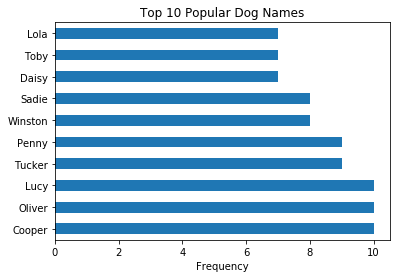

In [111]:
top_names = df.name.value_counts()[1:11]

ax = top_names.plot('barh', title='Top 10 Popular Dog Names')
ax.set_xlabel("Frequency");

##### Amount of Tweets overtime

In [112]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    294
2015-12    360
2016-01    166
2016-02    108
2016-03    118
2016-04     54
2016-05     56
2016-06     79
2016-07     87
2016-08     59
2016-09     63
2016-10     65
2016-11     52
2016-12     53
2017-01     66
2017-02     64
2017-03     47
2017-04     40
2017-05     42
2017-06     44
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

##### Dog Rating Distribution

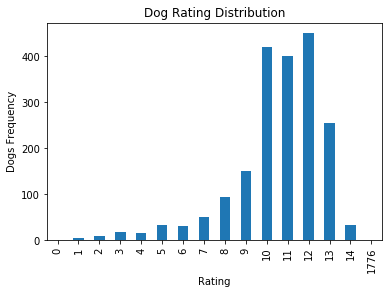

In [113]:
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating Distribution')
ax.set_xlabel("Rating")
ax.set_ylabel("Dogs Frequency");

##### Dog Stage Proportion

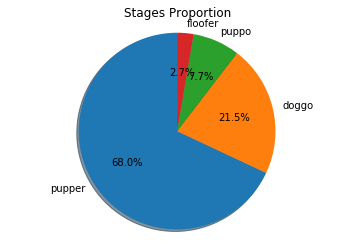

In [114]:
stages = df.stage.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(stages, labels=stages.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Stages Proportion")

plt.show()